# What's the problem ?

## In this notebook, we will be building a CNN to classify pictures in two classes : Cats and Dogs, read until the end, to see what happened.

### Lets start first by importing the data. It's a sample of 1000 picture. You can find the original dataset in [kaggle here](https://www.kaggle.com/c/dogs-vs-cats/)

In [1]:
!git clone https://github.com/BadriAhmed/Cats_Dogs.git

Cloning into 'Cats_Dogs'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), done.


### lets move to the directory where the data is stored, and than extract it (since it is a zip file )

In [2]:
%cd /content/Cats_Dogs

/content/Cats_Dogs


In [3]:
!unzip data.zip

Archive:  data.zip
   creating: Sample/
  inflating: Sample/cat.204.jpg      
  inflating: Sample/cat.413.jpg      
  inflating: Sample/cat.151.jpg      
  inflating: Sample/cat.481.jpg      
  inflating: Sample/cat.66.jpg       
  inflating: Sample/cat.284.jpg      
  inflating: Sample/dog.37.jpg       
  inflating: Sample/dog.77.jpg       
  inflating: Sample/dog.80.jpg       
  inflating: Sample/dog.20.jpg       
  inflating: Sample/cat.424.jpg      
  inflating: Sample/dog.366.jpg      
  inflating: Sample/cat.202.jpg      
  inflating: Sample/dog.432.jpg      
  inflating: Sample/cat.182.jpg      
  inflating: Sample/dog.464.jpg      
  inflating: Sample/cat.317.jpg      
  inflating: Sample/cat.266.jpg      
  inflating: Sample/cat.172.jpg      
  inflating: Sample/dog.162.jpg      
  inflating: Sample/cat.327.jpg      
  inflating: Sample/dog.78.jpg       
  inflating: Sample/dog.114.jpg      
  inflating: Sample/dog.258.jpg      
  inflating: Sample/dog.417.jpg      
  inflatin

#### Now lets get to work : First we will import librairies we need

In [0]:
import cv2 #OpenCV is a library of programming functions mainly aimed at real-time computer vision.
import matplotlib.pyplot as plt # Matplotlib for visualization
import numpy as np # Numpy for array manipulations later
from os import walk
import glob # walk and glob will be used to extract file names, since classes are in the names
import warnings
warnings.filterwarnings("ignore") #Disable warning 

#### Now, we will read images using opencv, then we wil resize them all to 64*64 pixel, normalize their values and store them in a list. And all of this in 1 Line ! See how cool can Python be ?

In [0]:
Images = [(cv2.resize((cv2.imread(file)),(64,64)))/255 for file in glob.glob("/content/Cats_Dogs/Sample/*.jpg")]    

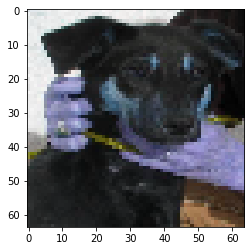

In [40]:
plt.imshow(Images[1]) #This is a dog

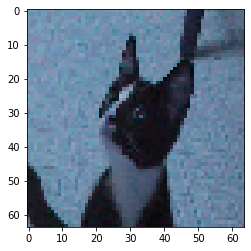

In [39]:
plt.imshow(Images[950]) #And this is a Cat 

#### Next, we extract file names from our folder

In [0]:
Names = []
for (dirpath, dirnames, filenames) in walk("/content/Cats_Dogs/Sample/"):
    Names.extend(filenames)
    break

In [43]:
Names[950] #We have to remove the extension (.jpg) and the first number

'cat.148.jpg'

#### Lets create a loop using for, chop the part where we have a dot (.), and remove the extension

In [0]:
i=0
for name in Names:
    name=name[:name.find('.')]
    name=name.replace(".jpg","")
    Names[i]=name
    i+=1

In [53]:
Names[300] #Perfect

'cat'

#### Now, we will use X as a name for the features, and Y for the target

In [0]:
X = Images
Y = Names

#### Let's split our data : 80%20% split

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

### we cannot use the word 'cat' or 'dog' in our model, se we will be using **Integer Encoding**, and **Binary Encoding** 

*   Integer Encoding : assign an integer for each different class on our dataset
*   Binary Encoding : Create a list with a lengh equal to the number of classes, and fill it with '0's, except the position assigned for a certain class, it will be set to '1'.



In [0]:
#Import what we need
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [58]:
# define example
values = np.array(Y_train)
print(values[:10])#show the first 10 elements

['cat' 'cat' 'cat' 'dog' 'cat' 'cat' 'cat' 'cat' 'cat' 'cat']


In [59]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(Y_train)
print(integer_encoded[:10])#show the first 10 elements

[0 0 0 1 0 0 0 0 0 0]


In [60]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:10])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [61]:
type(X_train)

list

In [0]:
X_train=np.array(X_train) #We need to convert X_train to an array to fit in our model
Y_train=onehot_encoded #Binary encoding result

#### Now we will build our model

In [0]:
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.layers import Dense, Activation,MaxPooling2D,Dropout,Flatten
from keras.layers.normalization import BatchNormalization

In [65]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
batch_normalization_4 (Batch (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 29, 29, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)       

#### and now we train it with a validation split of 20%

In [66]:
hist = model.fit(X_train,Y_train,batch_size=16,epochs=20,validation_split=0.2)

Train on 636 samples, validate on 160 samples
Epoch 1/20
636/636 [==============================] - 2s 3ms/step - loss: 1.3147 - acc: 0.6069 - val_loss: 2.4242 - val_acc: 0.5125
Epoch 2/20
636/636 [==============================] - 1s 1ms/step - loss: 0.8615 - acc: 0.6745 - val_loss: 1.4480 - val_acc: 0.5500
Epoch 3/20
636/636 [==============================] - 1s 1ms/step - loss: 0.7549 - acc: 0.6887 - val_loss: 1.5246 - val_acc: 0.5750
Epoch 4/20
636/636 [==============================] - 1s 1ms/step - loss: 0.4752 - acc: 0.8035 - val_loss: 1.5991 - val_acc: 0.6000
Epoch 5/20
636/636 [==============================] - 1s 1ms/step - loss: 0.5137 - acc: 0.7830 - val_loss: 1.3279 - val_acc: 0.6250
Epoch 6/20
636/636 [==============================] - 1s 1ms/step - loss: 0.3666 - acc: 0.8333 - val_loss: 1.5079 - val_acc: 0.5875
Epoch 7/20
636/636 [==============================] - 1s 1ms/step - loss: 0.2703 - acc: 0.8821 - val_loss: 1.0189 - val_acc: 0.6125
Epoch 8/20
636/636 [==========

#### So our model accuracy is 97%, that's good. We will proceed to the testing now 

In [0]:
X_test =np.array(X_test) #Convert list to an array

In [0]:
preds=model.predict_classes(X_test) #Predict the classes

In [0]:
Pred=list(label_encoder.inverse_transform(preds)) # Decode the result : [1:0] => cat

In [0]:
from sklearn.metrics import accuracy_score #Import accuracy for evaluation

In [71]:
accuracy_score(Y_test, Pred)

0.6

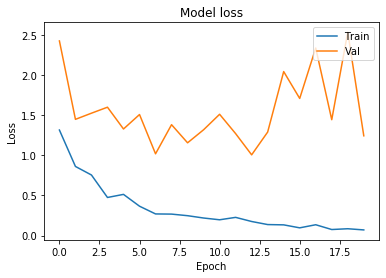

In [72]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

#### We only got 60% in the testing phase !
#### What happened here ? And why are we facing this problems ? and What are the solutions to avoid such a behaviour ? 